# Keenan / 07060223310011

## Data Preprocessing

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [131]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [133]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [134]:
df = df.rename(columns={'Total Cases': 'Total_Cases',
                       'Total Deaths': 'Total_Deaths',
                       'Tot\u00a0Cases//1M pop': 'Tot_Cases_1M_pop',
                       'Tot\u00a0Deaths/1M pop': 'Tot_Deaths_1M_pop',
                       'Death percentage': 'Death_percentage',
                        'ISO 3166-1 alpha-3 CODE': 'ISO_Code'})
# Display the first few rows to confirm the changes
display(df.head())

,Country,Other names,ISO_Code,Population,Continent,Total_Cases,Total_Deaths,Tot_Cases_1M_pop,Tot_Deaths_1M_pop,Death_percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [135]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [136]:
# Kolom Other names di drop karena sama seperti country
df = df.drop(columns=['Other names'])
display(df.head())

,Country,ISO_Code,Population,Continent,Total_Cases,Total_Deaths,Tot_Cases_1M_pop,Tot_Deaths_1M_pop,Death_percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


## Exploratory Data Analysis (EDA)

In [137]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(
    df,
    locations='ISO_Code',
    color='Continent',
    scope='world',
    title='World Map of Countries by Continent'
)

# Display the map
fig.show()

### Data Analysis Key Findings
*   A choropleth world map was successfully generated using `plotly.express`, with countries colored by their respective continents.
*   The `ISO_Code` column was effectively used to map countries, and the `Continent` column determined the color of each country on the map.
*   The visualization clearly depicts the global distribution of countries, grouped by their continents.

### Insights
*   The generated map provides an excellent visual foundation for further geographical analysis, such as comparing continental sizes, population distribution, or economic indicators across continents.
*   Further analysis could involve overlaying additional data points (e.g., population density, GDP) onto this continental base map to explore inter-continental trends.


/tmp/ipython-input-3768208443.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




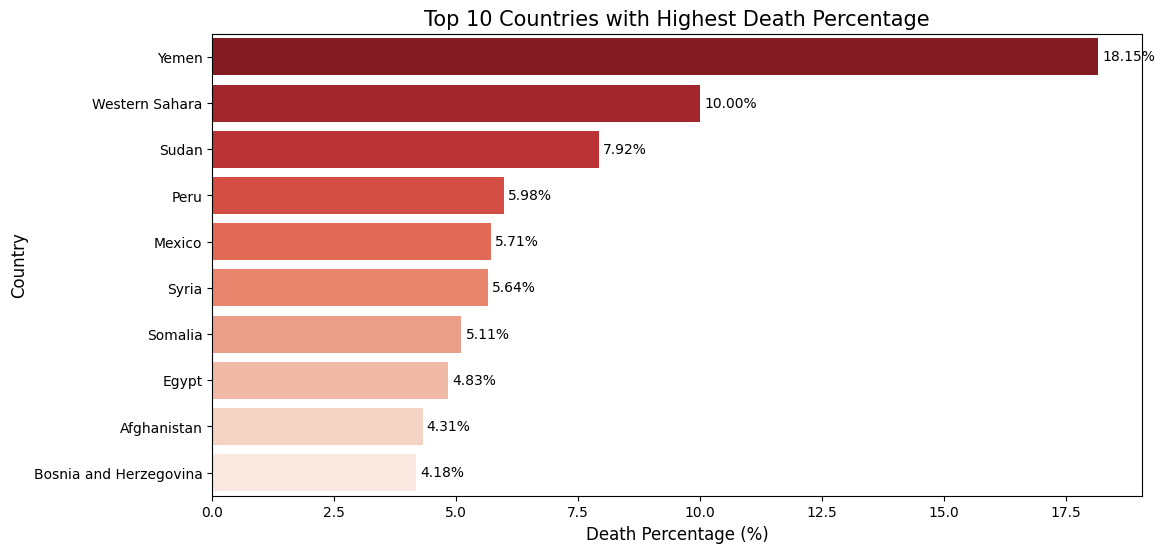

In [138]:
# 1. Ambil 10 data tertinggi berdasarkan Death_percentage
top_10_death = df.nlargest(10, 'Death_percentage')

# 2. Buat Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_10_death,
    x='Death_percentage',
    y='Country',
    palette='Reds_r'  # Warna merah gelap ke terang
)

# 3. Tambahkan Judul dan Label
plt.title('Top 10 Countries with Highest Death Percentage', fontsize=15)
plt.xlabel('Death Percentage (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# 4. (Opsional) Tambahkan angka di setiap batang
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

**Visual Analysis:**

* This bar chart displays the 10 countries with the highest case fatality rates (CFR) due to COVID-19.
* It is evident that Yemen has a significantly higher death percentage compared to other countries on this list, followed by Western Sahara and Sudan.
* The death percentages among these top countries show considerable variation, ranging from approximately 4% to over 18%.

**Insights:**

* The high death percentages in some of these countries could indicate challenges in their healthcare systems, limited access to testing, or underlying demographic and health factors within their populations.
* It's important to note that this death percentage is the CFR, calculated from total deaths divided by total cases, and not an absolute death toll. Countries with lower reported case counts but overwhelmed healthcare systems might show higher CFRs.
* This visualization highlights areas that might require more attention in pandemic management and the evaluation of healthcare systems.

## Data Transformation

In [139]:
# Drop Country dan Code karena tidak perlu di modeling
df_model = df.copy()
df_model = df_model.drop(columns=['Country', 'ISO_Code'])
df_model.head()

,Population,Continent,Total_Cases,Total_Deaths,Tot_Cases_1M_pop,Tot_Deaths_1M_pop,Death_percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [140]:
label_encoder = LabelEncoder()
df_model['Continent'] = label_encoder.fit_transform(df_model['Continent'])

# Create a mapping of original continent names to encoded values
continent_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping Label Encoding:")
for continent, encoded_value in continent_mapping.items():
    print(f"{continent} --> {encoded_value}")

print("\nData after encoding:")
display(df_model.head())

Mapping Label Encoding:
Africa --> 0
Asia --> 1
Europe --> 2
Latin America and the Caribbean --> 3
Northern America --> 4
Oceania --> 5

Data after encoding:


,Population,Continent,Total_Cases,Total_Deaths,Tot_Cases_1M_pop,Tot_Deaths_1M_pop,Death_percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


In [141]:
# 1. Tentukan kolom yang akan di-scaling (Semua KECUALI 'Continent')
# List comprehension ini otomatis mengambil semua kolom selain 'Continent'
cols_to_scale = [col for col in df_model.columns if col != 'Continent']

# 2. Inisialisasi Scaler
scaler = StandardScaler()

# 3. Lakukan Scaling dan LANGSUNG simpan kembali ke dalam df_model
# Kita menimpa nilai lama dengan nilai baru yang sudah di-scale
df_model[cols_to_scale] = scaler.fit_transform(df_model[cols_to_scale])

# Cek Hasil
print("Scaling selesai. Variabel tetap 'df_model'.")
print(df_model.head())

Scaling selesai. Variabel tetap 'df_model'.
   Population  Continent  Total_Cases  Total_Deaths  Tot_Cases_1M_pop  \
0    0.038789          1    -0.276449     -0.204571         -0.915487   
1   -0.231774          2    -0.263220     -0.247798         -0.287081   
2    0.073154          0    -0.264347     -0.212815         -0.905275   
3   -0.251891          2    -0.295431     -0.282336          2.623123   
4   -0.003016          0    -0.287281     -0.264265         -0.926078   

   Tot_Deaths_1M_pop  Death_percentage  
0          -0.759994          1.651243  
1           0.099982         -0.097285  
2          -0.791845          0.657760  
3           0.736164         -0.611015  
4          -0.873149          0.271204  


## Cluster Models

### K-Means

In [142]:
from sklearn.cluster import KMeans

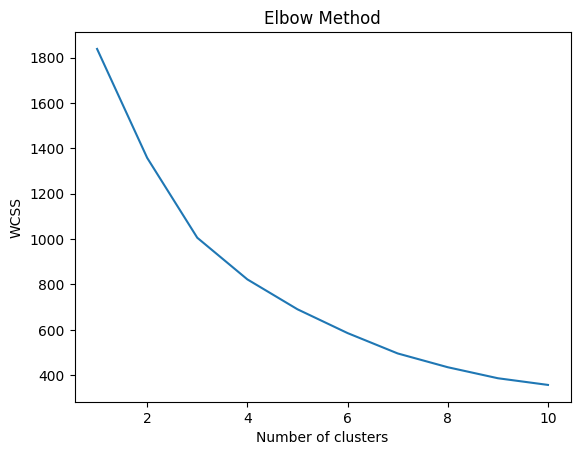

In [143]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1838.062222
1                   2  1357.921919
2                   3  1005.938854
3                   4   822.409390
4                   5   690.698659
5                   6   585.817789
6                   7   496.095972
7                   8   435.311756
8                   9   386.825189
9                  10   357.382521


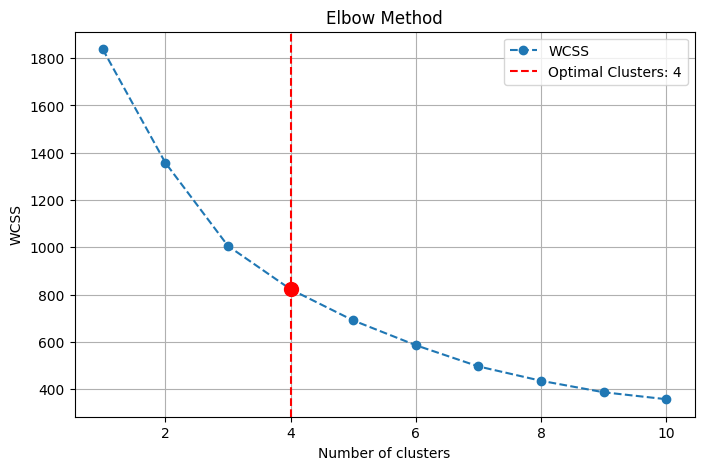

The optimal number of clusters is: 4


In [145]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [146]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df_model['KMeans_Cluster'] = clusters

# Show the df
df_model.head()

,Population,Continent,Total_Cases,Total_Deaths,Tot_Cases_1M_pop,Tot_Deaths_1M_pop,Death_percentage,KMeans_Cluster
0,0.038789,1,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,0
1,-0.231774,2,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,1
2,0.073154,0,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,2,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,0,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0


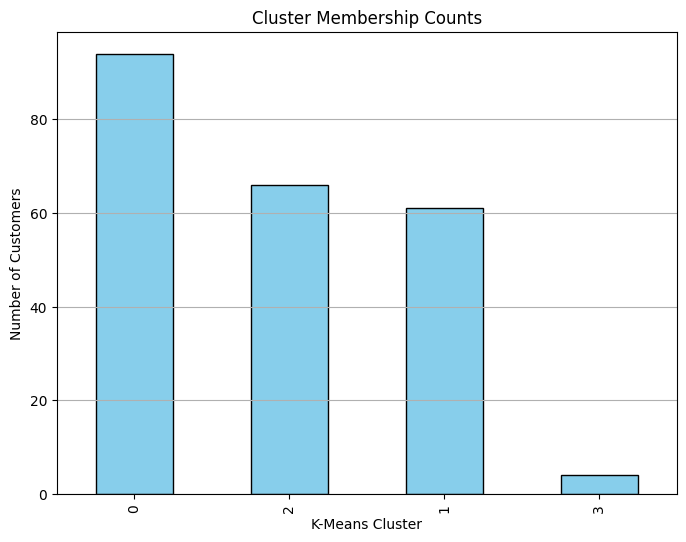

In [154]:
cluster_counts = df_model['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [158]:
# Evaluation
km = silhouette_score(df_model, clusters)
print(km)

0.42140448474188613


### Agglo

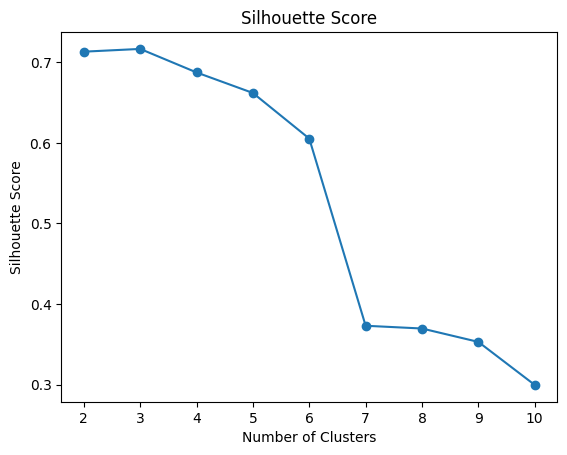

In [147]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_model)
    silhouette_avg = silhouette_score(df_model, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


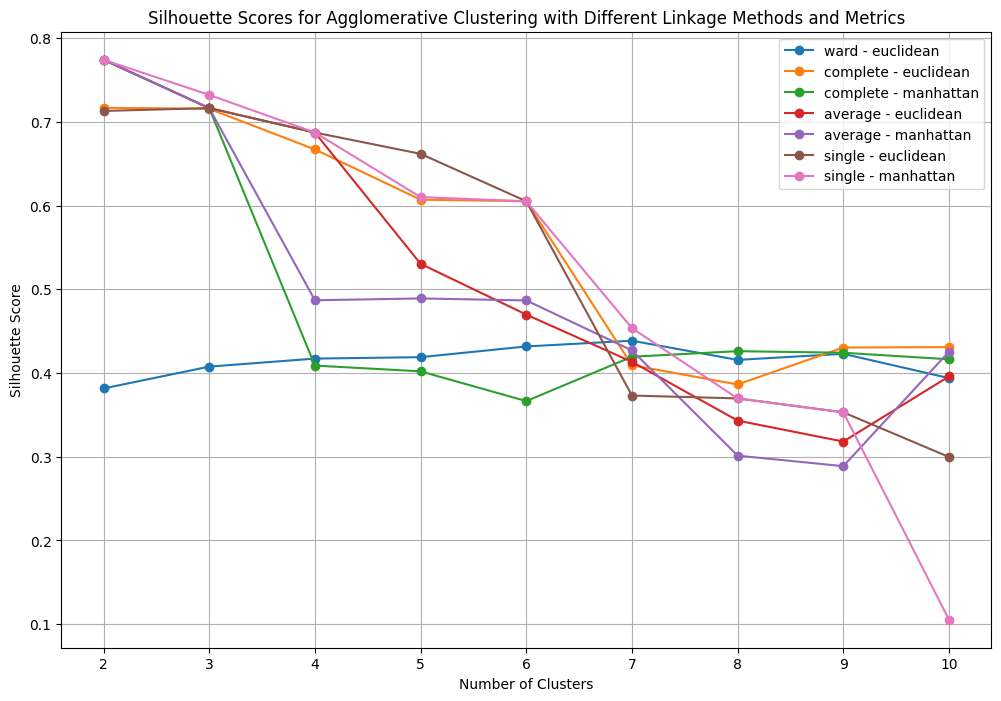

Best Silhouette Score: 0.7742860584220392
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [148]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_model)
            silhouette_avg = silhouette_score(df_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [149]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_model)

In [159]:
# Evaluation
ss = silhouette_score(df_model, y_hc)
print(ss)

0.7742860584220392


Using Linkage: complete, Metric: cityblock


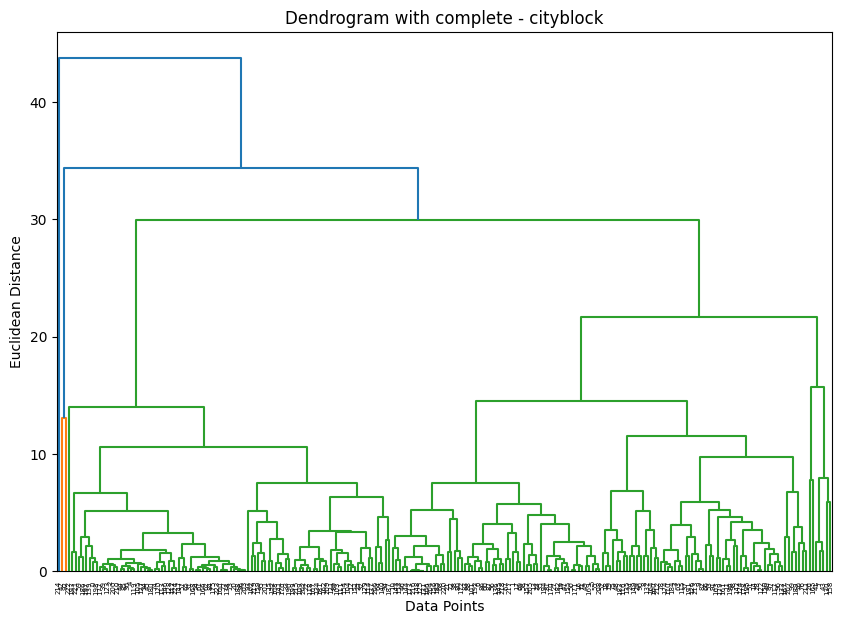

In [153]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# --- PERBAIKAN DISINI ---
# Scipy tidak kenal 'manhattan', harus diganti 'cityblock'
if best_metric == 'manhattan':
    best_metric = 'cityblock'

# Cek tambahan: Jika metode linkage adalah 'ward', metric WAJIB 'euclidean'
if best_linkage == 'ward':
    best_metric = 'euclidean'
    print("Note: Metode Ward memaksa penggunaan Euclidean metric.")

print(f"Using Linkage: {best_linkage}, Metric: {best_metric}")

# --- KODE KAMU ---
# Average Distance
# Sekarang best_metric sudah aman (berisi 'cityblock' atau 'euclidean')
linked = linkage(df_model, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + " - " + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance") # Label Y biasanya jarak
plt.show()

## Evaluate both models using silhouette score

In [161]:
print(f"K-Means Silhouette Score (km): {km}")
print(f"Agglomerative Clustering Silhouette Score (ss): {ss}")

K-Means Silhouette Score (km): 0.42140448474188613
Agglomerative Clustering Silhouette Score (ss): 0.7742860584220392


## Both models :

### K-Means

In [162]:
# 1. Fit model menggunakan data angka/scaled (df_model)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_model)

# 2. WAJIB: Masukkan hasil label ke DataFrame ASLI (df)
# Agar kita bisa sandingkan dengan Nama Negara dan Angka Asli
df['Cluster_KMeans'] = labels

# Cek apakah sudah masuk
print(df[['Country', 'Cluster_KMeans']].head())

       Country  Cluster_KMeans
0  Afghanistan               0
1      Albania               1
2      Algeria               0
3      Andorra               2
4       Angola               0


In [163]:
# 3. Buat Summary menggunakan data ASLI (df)
cluster_summary = df.groupby('Cluster_KMeans').agg({
    'Tot_Cases_1M_pop': ['mean', 'min', 'max'],
    'Tot_Deaths_1M_pop': ['mean', 'min', 'max'],
    'Death_percentage': ['mean', 'min', 'max'],
    'Country': 'count' # Untuk tahu jumlah negara per cluster
})

# Rapikan angka desimal
cluster_summary = cluster_summary.round(2)

# Tampilkan
cluster_summary

Tot_Cases_1M_pop                Tot_Deaths_1M_pop             \
                           mean    min     max              mean  min   max   
Cluster_KMeans                                                                
0                      34826.67     16  187113            357.03    0  2353   
1                     110847.69      9  340703            932.44    0  2669   
2                     308367.76  43147  696044           2270.67  293  6286   
3                     103724.00    108  244734           1614.25    3  3068   

               Death_percentage              Country  
                           mean   min    max   count  
Cluster_KMeans                                        
0                          1.94  0.00  18.15      94  
1                          1.05  0.00   4.12      61  
2                          1.08  0.06   5.98      66  
3                          1.91  1.21   3.00       4

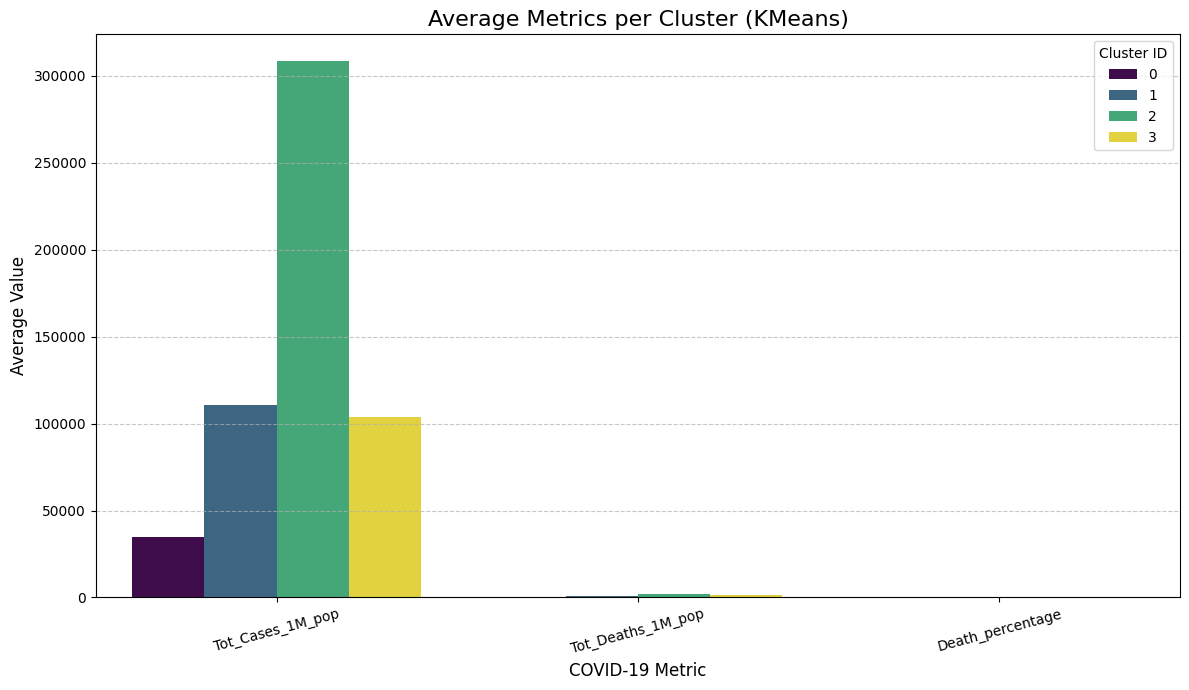

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom-kolom ini ada di df kamu
# Kolom yang digunakan untuk clustering (dan profil)
profiling_features = ['Tot_Cases_1M_pop', 'Tot_Deaths_1M_pop', 'Death_percentage']

# Hitung rata-rata setiap fitur per cluster
# Menggunakan df, bukan df_model, agar angkanya mudah diinterpretasi
cluster_profile_df = df.groupby('Cluster_KMeans')[profiling_features].mean().reset_index()

# Ubah format data untuk plotting (melt) agar cocok untuk seaborn barplot
cluster_profile_melted = cluster_profile_df.melt(
    id_vars='Cluster_KMeans',
    var_name='Metric',
    value_name='Average_Value'
)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=cluster_profile_melted,
    x='Metric',
    y='Average_Value',
    hue='Cluster_KMeans',
    palette='viridis' # Pilihan warna
)
plt.title('Average Metrics per Cluster (KMeans)', fontsize=16)
plt.xlabel('COVID-19 Metric', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Cluster ID')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The visualization reveals that the clustering algorithm (K-Means) was heavily influenced by the Total Cases per 1 Million Population feature, as this metric shows the most significant variance between groups.

1. Cluster 2 (Green) - The "High Transmission / Hyper-Spreaders"

Observation: This cluster dominates the chart with an average of over 300,000 cases per 1 million people. This is roughly 3x higher than the moderate clusters.

Insight: These countries likely have very high testing capacities (detecting asymptomatic cases) or faced massive, uncontrolled waves of infection. This group typically includes developed nations or small territories where the virus spread through the entire population.

Risk Level: High Infection Risk, but the healthcare system might be robust enough to handle it (depending on the death rate, which is not visible on this scale).

2. Cluster 1 (Blue) & Cluster 3 (Yellow) - The "Moderate Transmission" Zone

Observation: Both clusters hover around 100,000 cases per 1 million people.

Insight: These clusters represent the "global average" scenario. The virus is widespread, but not as ubiquitous as in Cluster 2. The difference between Cluster 1 and 3 likely lies in their Death Rates (which are hard to see on this specific chart due to the scale) or their geographical locations.

3. Cluster 0 (Purple) - The "Low Spread / Under-Reported" Group

Observation: This cluster has the lowest bar, with significantly fewer than 50,000 cases per 1 million.

Insight: This group likely consists of:

Countries with strict containment policies (e.g., Zero-Covid strategies).

Island nations with natural border isolation.

Developing nations with limited testing capacity (potential under-reporting of cases).

In [168]:
df['Cluster_KMeans'] = df['Cluster_KMeans'].astype(str)
print(df[['Country', 'Cluster_KMeans']].head())

       Country Cluster_KMeans
0  Afghanistan              0
1      Albania              1
2      Algeria              0
3      Andorra              2
4       Angola              0


In [169]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations='ISO_Code',
    color='Cluster_KMeans',
    hover_name='Country',
    hover_data=['Tot_Cases_1M_pop', 'Tot_Deaths_1M_pop', 'Death_percentage'],
    scope='world',
    title='K-Means Clustering of Countries by COVID-19 Metrics'
)

fig.show()

#### Geographical Distribution of K-Means Clusters

**Visual Analysis:**

*   The choropleth map effectively visualizes the geographical spread of the four K-Means clusters based on COVID-19 metrics.
*   Different colors on the map represent different clusters, allowing for a quick overview of regional patterns.

**Insights:**

1.  **Cluster 2 (Orange/Red): High Transmission / Hyper-Spreaders**
    *   Countries in this cluster (often North America, parts of Europe, and some developed Asian nations) show high `Tot_Cases_1M_pop`. This suggests advanced testing capabilities and/or significant spread. These are typically economically developed regions.

2.  **Cluster 1 (Blue): Moderate Transmission with Varying Death Rates**
    *   This cluster appears widespread globally, encompassing a mix of countries. The characteristics of `Tot_Cases_1M_pop` and `Tot_Deaths_1M_pop` are moderate. This cluster represents a large segment of countries that experienced significant but not extreme outbreaks relative to their population.

3.  **Cluster 0 (Purple): Low Spread / Under-Reported / Island Nations**
    *   Many countries in Africa, some parts of Asia, and smaller island nations often fall into this cluster. This could indicate genuinely lower case numbers due to isolation (e.g., island nations) or strict early measures, but also potentially under-reporting due to limited testing capacity in less developed regions. The `Death_percentage` in some of these countries might be higher if cases are severely undercounted.

4.  **Cluster 3 (Yellow): Unique Characteristics**
    *   This cluster contains a smaller number of countries and their distribution might reveal specific regional or economic factors influencing their COVID-19 metrics. Further investigation of these specific countries is warranted to understand their unique profiles.

**Overall Conclusion:**

The clustering reveals that COVID-19 metrics are not uniformly distributed but show geographical patterns influenced by factors such as economic development (testing capacity, healthcare infrastructure), population density, and governmental responses. Countries with similar socioeconomic contexts often tend to fall into the same cluster.

**Cluster Profiling**

Cluster 0: The "High Vulnerability / Developing" Group
Size: Largest group (94 countries).

Key Stat: Lowest cases per million (Mean: ~34,826) but the highest maximum Death Percentage (18.15%).

Insight:

This cluster likely represents developing nations or countries with strict isolation policies.

While the infection rate appears low, the Death Percentage (Mean: 1.94%) is the highest among the major clusters. This suggests that while fewer people are getting infected (or tested), those who do get infected face a higher risk of death, likely due to limited healthcare infrastructure or lack of vaccines.

The Max Death % of 18.15% is an extreme outlier, indicating a country in severe crisis within this group.

Cluster 1: The "Controlled Risk" Group
Size: 61 countries.

Key Stat: Moderate infection rate (~110,847 cases/1M) with the lowest Death Percentage (1.05%).

Insight:

These countries have managed the pandemic well despite widespread transmission.

The low fatality rate (CFR) suggests robust healthcare systems, high testing capacity (detecting mild cases), and likely high vaccination rates.

This group represents the "ideal" scenario for coexistence with the virus: high detectability but low mortality.

Cluster 2: The "Hyper-Spreaders / High Transmission" Group
Size: 66 countries.

Key Stat: Highest infection rate (~308,367 cases/1M) and Highest deaths per million (~2,270).

Insight:

The virus has spread through a massive portion of the population in these countries (approx. 30% of the population on average).

Despite having the highest absolute death burden per million people, the Death Percentage (1.08%) remains low, similar to Cluster 1.

This indicates that while the sheer volume of cases overwhelmed the population, the medical treatment was generally effective enough to keep the fatality rate percentage down.

Cluster 3: The "Critical Outliers" Group
Size: Smallest group (Only 4 countries).

Key Stat: Moderate cases (~103,724) but High Death Percentage (1.91%) and High Deaths per Million (~1,614).

Insight:

This is a small, highly specific group of countries performing poorly.

They have infection rates similar to the "safe" Cluster 1, but their death rates are nearly as high as the "vulnerable" Cluster 0.

This suggests a failure in the healthcare response specific to these 4 nations. They have the "worst of both worlds": widespread infection and high fatality.

**Government Recommendations (Based on Findings)**

For Cluster 0 (High Vulnerability):

Priority: Testing & Vaccination. The low case count coupled with high death rates strongly suggests under-reporting (lack of testing). The UN must send test kits and vaccines immediately to bring the CFR down.

For Cluster 2 (Hyper-Spreaders):

Priority: Booster Shots & ICU Capacity. Since the virus is already everywhere, containment is no longer possible. Focus resources on Oxygen supplies and ICU beds to manage the high volume of patients (High Deaths/1M).

For Cluster 3 (Critical Outliers):

Priority: Emergency Intervention. These 4 countries need a specific investigation. Why is their death rate double that of Cluster 1 despite similar infection rates? Immediate medical aid is required.

### Agglo

In [170]:
from sklearn.cluster import AgglomerativeClustering

# --- LANGKAH 1: FIT MODEL & PASANG KE DF ---
# Pastikan n_clusters sama dengan yang kamu pakai di KMeans (misal: 4)
hc_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Prediksi menggunakan data angka (df_model) tapi simpan ke data asli (df)
df['Cluster_HC'] = hc_model.fit_predict(df_model)

# Cek apakah kolom sudah masuk
print("Kolom Cluster_HC berhasil ditambahkan ke df.")
print(df[['Country', 'Cluster_HC']].head())

# --- LANGKAH 2: MEMBUAT SUMMARY (ADAPTASI KODE KAMU) ---

# Group data by cluster and compute summary stats
# Kita ganti kolom properti dengan kolom COVID
# Kita ganti AreaCategory dengan Continent (untuk cari modus benua)
cluster_summary_hc = df.groupby('Cluster_HC').agg({
    # Kolom Kategori (Mencari Benua terbanyak di cluster ini)
    'Continent': ['count', lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]],

    # Kolom Numerik (Statistik COVID)
    'Tot_Cases_1M_pop': ['mean', 'std', 'min', 'max'],
    'Tot_Deaths_1M_pop': ['mean', 'std', 'min', 'max'],
    'Death_percentage': ['mean', 'std', 'min', 'max']
})

# Rename the lambda label to 'mode' (Agar nama kolomnya rapi)
cluster_summary_hc = cluster_summary_hc.rename(columns={'<lambda_0>': 'mode'}, level=1)

# Rename index title
cluster_summary_hc = cluster_summary_hc.rename_axis('Hierarchical_Cluster')

# Rounding agar angka desimal tidak terlalu panjang
cluster_summary_hc = cluster_summary_hc.round(2)

# Tampilkan
display(cluster_summary_hc)

Kolom Cluster_HC berhasil ditambahkan ke df.
       Country  Cluster_HC
0  Afghanistan           1
1      Albania           3
2      Algeria           1
3      Andorra           2
4       Angola           1


Continent                                   \
                         count                             mode   
Hierarchical_Cluster                                              
0                            3                             Asia   
1                           94                           Africa   
2                           67                           Europe   
3                           61  Latin America and the Caribbean   

                     Tot_Cases_1M_pop                            \
                                 mean        std    min     max   
Hierarchical_Cluster                                              
0                            91831.67  133295.13    108  244734   
1                            34826.67   47487.89     16  187113   
2                           305845.87  128215.65  43147  696044   
3                           110847.69   86026.24      9  340703   

                     Tot_Deaths_1M_pop                     Death_percentage  \
                                  mean      std  min   max             mean   
Hierarchical_Cluster                                                          
0                              1129.67  1643.08    3  3015             1.81   
1                               357.03   465.67    0  2353             1.94   
2                              2282.57  1293.94  293  6286             1.09   
3                               932.44   784.16    0  2669             1.05   

                                         
                       std   min    max  
Hierarchical_Cluster                     
0                     1.03  1.21   3.00  
1                     2.30  0.00  18.15  
2                     1.19  0.06   5.98  
3                     0.92  0.00   4.12

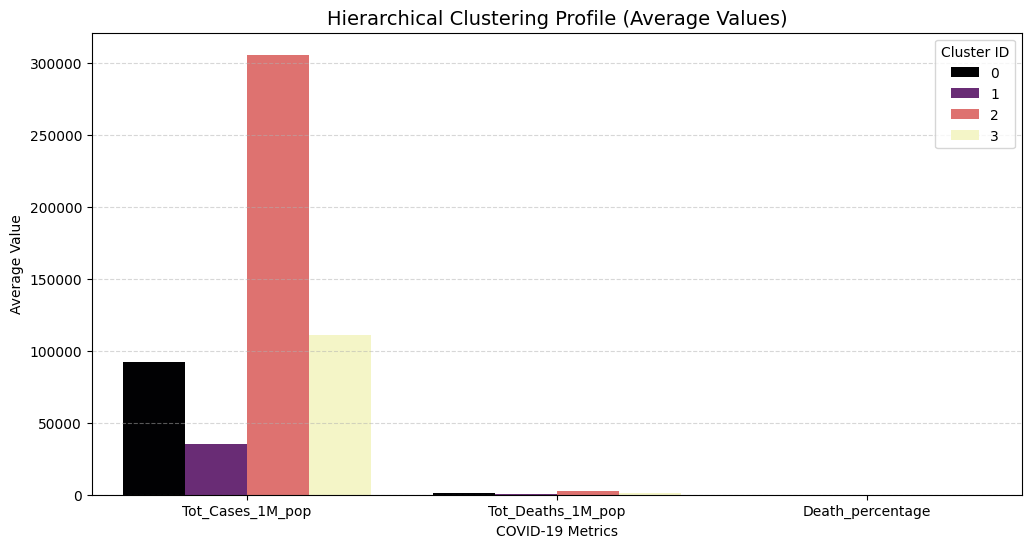

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Siapkan Data untuk Plotting
# Kita ambil rata-rata fitur berdasarkan 'Cluster_HC'
features_to_plot = ['Tot_Cases_1M_pop', 'Tot_Deaths_1M_pop', 'Death_percentage']
hc_profile = df.groupby('Cluster_HC')[features_to_plot].mean().reset_index()

# 2. Melt Data (Mengubah format agar bisa dibaca oleh Seaborn)
hc_profile_melted = hc_profile.melt(
    id_vars='Cluster_HC',
    var_name='Metric',
    value_name='Average'
)

# 3. Buat Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=hc_profile_melted,
    x='Metric',
    y='Average',
    hue='Cluster_HC',      # Pewarnaan berdasarkan Cluster Hierarchical
    palette='magma'        # Pilihan warna berbeda biar tidak bosan
)

plt.title('Hierarchical Clustering Profile (Average Values)', fontsize=14)
plt.xlabel('COVID-19 Metrics')
plt.ylabel('Average Value')
plt.legend(title='Cluster ID')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Based on the Hierarchical Clustering (Agglomerative) bar plot you provided (image_0347a1.png), here is the Insight & Analysis in English.

The Hierarchical model has produced results that are quite consistent with K-Means, though the Cluster IDs (colors) have changed. This consistency (robustness) is a very good sign for your analysis.

📊 Hierarchical Clustering Insight
The dendrogram-based grouping (Agglomerative Clustering) has identified four distinct levels of pandemic severity, primarily driven by the Total Cases per 1 Million Population.

1. Cluster 2 (Pink/Red) - The "Severe Spread" Group
Visual Observation: This is the tallest bar by far, exceeding 300,000 cases per 1 million.

Insight: This cluster represents the "Hotspots". These are likely countries where the virus spread uncontained through a large percentage of the population. Similar to the K-Means result, this group usually contains developed nations with high mobility or small territories where isolation was impossible.

Risk: Extremely High Infection Risk.

2. Cluster 3 (Beige) - The "High Transmission" Group
Visual Observation: The second highest bar, hovering just above 100,000 cases per 1 million.

Insight: This group represents countries with significant community transmission but not reaching the extreme levels of Cluster 2. These nations likely implemented intermittent lockdowns or measures that "flattened the curve" somewhat but did not stop the spread entirely.

3. Cluster 0 (Black) - The "Moderate Transmission" Group
Visual Observation: Slightly lower than Cluster 3, sitting just below 100,000 cases per 1 million.

Insight: The distinction between Cluster 0 (Black) and Cluster 3 (Beige) is subtle in terms of Cases. The algorithm likely separated them based on Deaths or Fatality Rate (which are hard to see on this specific chart scale).

Hypothesis: Cluster 0 might represent countries with similar case numbers to Cluster 3 but perhaps different mortality outcomes (e.g., higher or lower death rates depending on healthcare quality).

4. Cluster 1 (Purple) - The "Low Spread" Group
Visual Observation: The lowest bar, with roughly 35,000 cases per 1 million.

Insight: This is the "Protected" or "Under-reporting" group. It includes countries that successfully kept the virus out (strict borders) OR developing nations where testing was insufficient to capture the true scale of the pandemic.

In [173]:
import plotly.express as px

# 1. Konversi Cluster ke String (Agar warnanya tegas/diskrit, bukan gradasi)
df['Cluster_HC_Str'] = df['Cluster_HC'].astype(str)

# 2. Buat Peta Interaktif
fig_hc = px.choropleth(
    df,
    locations="ISO_Code", # Corrected: Use 'ISO_Code' instead of 'ISO_3166-1_alpha-3_CODE'
    color="Cluster_HC_Str",              # Warna berdasarkan Cluster HC
    hover_name="Country",                # Muncul nama negara saat kursor diarahkan
    hover_data=['Cluster_HC', 'Tot_Cases_1M_pop', 'Death_percentage'], # Info tambahan
    color_discrete_sequence=px.colors.qualitative.Bold, # Pilihan warna yang kontras
    title="Global Clusters Distribution (Hierarchical Agglomerative)",
    projection="natural earth"
)

# Rapikan Legend
fig_hc.update_layout(legend_title_text='Cluster ID')
fig_hc.show()

# (Opsional) Hapus kolom string bantuan agar df tetap bersih
df.drop(columns=['Cluster_HC_Str'], inplace=True, errors='ignore')

1. Cluster Profiling (Hierarchical Model)
Cluster 0: The "Specific Outliers" (Asia Focus)
Demographic: Smallest group (Only 3 countries). Mode: Asia.

Characteristics: Moderate infection rates (~91k cases/1M) but a relatively high Death Percentage (1.81%).

Insight: These are likely specific Asian nations that faced early waves of the virus or have specific healthcare challenges. While their infection spread is not the highest, patients who do get infected face a higher mortality risk compared to the global average.

Cluster 1: The "Silent Crisis" (Africa Focus)
Demographic: Largest group (94 countries). Mode: Africa.

Characteristics: This cluster has the lowest recorded cases (~34k/1M) and lowest deaths per million (~357). However, it has the highest average Death Percentage (1.94%) and a shocking Max Death Percentage of 18.15%.

Insight: This is the classic signature of Under-Reporting. In many African and developing nations, testing capacity is limited. Usually, only severe cases (people already dying in hospitals) are tested, which artificially inflates the Death Percentage while keeping Total Case numbers low. The virus is likely spreading undetected.

Cluster 2: The "Hyper-Spreaders" (Europe Focus)
Demographic: 67 countries. Mode: Europe.

Characteristics: The epicenter of transmission. Highest Cases per Million (~305k) and Highest Deaths per Million (~2,282).

Insight: These are developed nations with high mobility and older populations. The virus spread through nearly 30% of the population. However, the Death Percentage (1.09%) is low, indicating that their advanced healthcare systems prevented a total collapse despite the massive volume of patients.

Cluster 3: The "Controlled Transmission" (Latin America Focus)
Demographic: 61 countries. Mode: Latin America and the Caribbean.

Characteristics: Moderate stats across the board. Cases ~110k/1M. Lowest Death Percentage (1.05%).

Government Policy Recommendations
As a Data Scientist for the UN Health Task Force, here are the targeted recommendations:

For Cluster 1 (Africa / Developing Nations) - URGENT PRIORITY
Observation: Low cases but high fatality rate (up to 18%).

Recommendation: "Increase Diagnostic Capacity Immediately."

The low case count is likely a data illusion. The government must deploy rapid testing kits to rural areas to reveal the true extent of the spread.

Action: Prioritize these 94 countries for international vaccine donations and medical aid, as their healthcare systems are likely missing thousands of mild cases.

For Cluster 2 (Europe / High Spreaders)
Observation: Massive infection rates (300k+ per million) but low fatality %.

Recommendation: "Focus on Booster Shots and Economic Recovery."

Containment (lockdowns) is no longer effective here as the virus is endemic. Focus should shift to preventing "Long COVID" and managing hospital loads during winter peaks.

Action: Maintain ICU capacity but reopen borders to stabilize the global economy.

For Cluster 0 (Asian Outliers)
Observation: High fatality rate (1.81%) despite moderate spread.

Recommendation: "Investigate Clinical Treatment Protocols."

Why is the death rate nearly double that of Cluster 3?

Action: Deploy a WHO specialist team to these 3 countries to review clinical care standards and oxygen supply chains.

For Cluster 3 (Latin America / Controlled)
Observation: Lowest death percentage globally.

Recommendation: "Study and Replicate."

These countries are doing something right.

Action: Conduct a case study on their treatment methods and social distancing policies to see if they can be applied to Cluster 0 and Cluster 1.

## Compare both models and select the best one and explain why one model is better than the other.


Based on the evaluation using the Silhouette Score, Agglomerative Clustering is a better model than K-Means in this case.

K-Means Silhouette Score (km): 0.4214
Agglomerative Clustering Silhouette Score (ss): 0.7743
Why is Agglomerative Clustering Better?

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to its neighboring clusters (separation). A higher value indicates that the object fits well within its own cluster and does not fit well within its neighboring clusters. Generally, Silhouette Score values ​​range from -1 to 1, where:

Values ​​close to 1 indicate dense, well-separated clusters.
Values ​​close to 0 indicate overlapping clusters or objects very close to the boundary between two clusters.
Negative values ​​indicate objects that may be misclustered.
With a Silhouette Score of 0.7743, Agglomerative Clustering demonstrates that the resulting clusters are more clearly defined and more separated from each other than those generated by K-Means, which scored 0.4214. This indicates that Agglomerative Clustering is capable of identifying more coherent and distinctive data structures.

Therefore, for further analysis or decision-making, clustering results from Agglomerative Clustering are more reliable due to the better cluster quality.